In [1]:
#IMPORTS
#import base libraries for manipulation and plotting
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
#set seaborne as default
sns.set()
#ML libraries
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC
#Preprocessing libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split as ttsp


In [2]:
#IMPORT dataset
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
print('train shape : ',train_df.shape,' test shape : ',test_df.shape)
#Describe the dataset
train_df.describe()

train shape :  (2952, 70)  test shape :  (1969, 69)


,tumor_cell_count,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,alcohol_consume_units,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,symptom7,symptom8,symptom9,symptom10,symptom11,symptom12,symptom13,symptom14,symptom15,symptom16,symptom17,symptom18,symptom19,symptom20,symptom21,symptom22,symptom23,symptom24,symptom25,symptom26,symptom27,symptom28,symptom29,symptom30,symptom31,symptom32,symptom33,symptom34,symptom35,symptom36,symptom37,symptom38,symptom39,symptom40,symptom50,symptom51,symptom52,symptom53,symptom54,symptom55,symptom56,symptom57,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer
count,2952.000000,2952.000000,2952.000000,2550.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.00000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000
mean,8.036924,2010.925136,80940.815718,2016.694118,14.992209,5.195799,3.258469,0.139566,0.021341,0.021680,0.131436,0.047425,0.047764,0.392276,0.023035,0.047764,0.049797,0.019986,0.11687,0.137534,0.050136,0.188347,0.232724,0.020664,0.044038,0.113144,0.021341,0.025068,0.027100,0.143631,0.074187,0.024051,0.024051,0.138889,0.050136,0.023035,0.021680,0.020664,0.021341,0.022696,0.023374,0.101626,0.022358,0.020325,0.049119,0.043022,0.024051,0.021341,0.024051,0.021003,0.099593,0.022358,0.021341,0.021003,0.026423,0.026762,0.026423,0.026084,0.023713,0.019986,0.020325,0.019648,0.019986,0.024729,0.699526
std,24.840630,1.402237,1357.411378,1.745409,7.926741,2.459212,2.372024,0.346595,0.144544,0.145662,0.337934,0.212583,0.213303,0.488340,0.150041,0.213303,0.217562,0.139977,0.32132,0.344468,0.218261,0.391055,0.422639,0.142281,0.205214,0.316822,0.144544,0.156357,0.162403,0.350775,0.262119,0.153235,0.153235,0.345889,0.218261,0.150041,0.145662,0.142281,0.144544,0.148959,0.151114,0.302207,0.147869,0.141134,0.216154,0.202940,0.153235,0.144544,0.153235,0.143417,0.299508,0.147869,0.144544,0.143417,0.160416,0.161413,0.160416,0.159412,0.152178,0.139977,0.141134,0.138810,0.139977,0.155324,0.458542
min,1.000000,2009.000000,80003.000000,2013.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2010.000000,80103.000000,2015.000000,10.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2011.000000,80463.000000,2017.000000,15.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [3]:
#Check null values to see what needs to be imputed / dropped
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             2952 non-null   object 
 1   tumor_cell_count       2952 non-null   int64  
 2   gender                 2952 non-null   object 
 3   age_group              2927 non-null   object 
 4   race                   2649 non-null   object 
 5   year_of_diagnosis      2952 non-null   int64  
 6   morphology_code        2952 non-null   int64  
 7   year_of_death          2550 non-null   float64
 8   smoke_units            2952 non-null   int64  
 9   area_code              2952 non-null   int64  
 10  alcohol_consume_units  2952 non-null   int64  
 11  symptoms               2952 non-null   object 
 12  symptom1               2952 non-null   float64
 13  symptom2               2952 non-null   float64
 14  symptom3               2952 non-null   float64
 15  symp

In [4]:
test_df.describe()

,tumor_cell_count,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,alcohol_consume_units,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,symptom7,symptom8,symptom9,symptom10,symptom11,symptom12,symptom13,symptom14,symptom15,symptom16,symptom17,symptom18,symptom19,symptom20,symptom21,symptom22,symptom23,symptom24,symptom25,symptom26,symptom27,symptom28,symptom29,symptom30,symptom31,symptom32,symptom33,symptom34,symptom35,symptom36,symptom37,symptom38,symptom39,symptom40,symptom50,symptom51,symptom52,symptom53,symptom54,symptom55,symptom56,symptom57,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66
count,1969.000000,1969.000000,1969.000000,1687.000000,1969.000000,1969.000000,1969.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.00000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000
mean,7.644997,2010.853225,80883.195023,2016.598103,14.791772,5.326562,3.295074,0.135163,0.022866,0.022358,0.150407,0.041667,0.03811,0.393293,0.023374,0.044207,0.041159,0.024898,0.111280,0.138211,0.037602,0.180894,0.233232,0.029980,0.049797,0.116870,0.025915,0.020325,0.017276,0.141260,0.068598,0.024898,0.024898,0.145325,0.043699,0.023374,0.025407,0.026931,0.025915,0.023882,0.025915,0.082317,0.024390,0.027439,0.045224,0.051321,0.024898,0.019817,0.021850,0.026423,0.091463,0.024390,0.025915,0.023374,0.021341,0.017785,0.021341,0.021850,0.025407,0.024898,0.024390,0.028455,0.027947,0.020833
std,23.119727,1.394054,1294.474641,1.773924,7.931638,2.456638,2.399988,0.341984,0.149514,0.147882,0.357560,0.199877,0.19151,0.488605,0.151127,0.205608,0.198707,0.155855,0.314559,0.345209,0.190279,0.385028,0.422996,0.170575,0.217580,0.321347,0.158921,0.141146,0.130333,0.348378,0.252833,0.155855,0.155855,0.352518,0.204477,0.151127,0.157396,0.161923,0.158921,0.152721,0.158921,0.274917,0.154297,0.163400,0.207847,0.220708,0.155855,0.139407,0.146229,0.160430,0.288340,0.154297,0.158921,0.151127,0.144557,0.132201,0.144557,0.146229,0.157396,0.155855,0.154297,0.166312,0.164863,0.142862
min,1.000000,2009.000000,80003.000000,2013.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2010.000000,80103.000000,2015.000000,10.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2011.000000,80463.000000,2017.000000,15.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 69 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             1969 non-null   object 
 1   tumor_cell_count       1969 non-null   int64  
 2   gender                 1969 non-null   object 
 3   age_group              1954 non-null   object 
 4   race                   1770 non-null   object 
 5   year_of_diagnosis      1969 non-null   int64  
 6   morphology_code        1969 non-null   int64  
 7   year_of_death          1687 non-null   float64
 8   smoke_units            1969 non-null   int64  
 9   area_code              1969 non-null   int64  
 10  alcohol_consume_units  1969 non-null   int64  
 11  symptoms               1969 non-null   object 
 12  symptom1               1968 non-null   float64
 13  symptom2               1968 non-null   float64
 14  symptom3               1968 non-null   float64
 15  symp

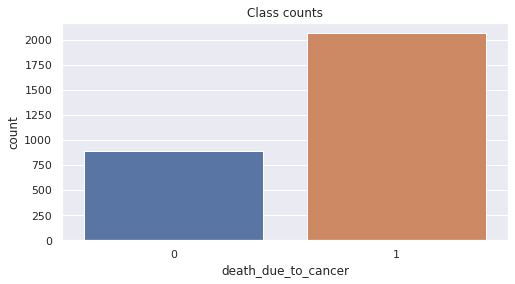

In [6]:
#checking class counts to identify imbalance
plt.figure(figsize=(8,4))
sns.countplot(x = train_df['death_due_to_cancer'])
plt.title("Class counts")
plt.show()
#Class imbalance is seen, will need to be tackled

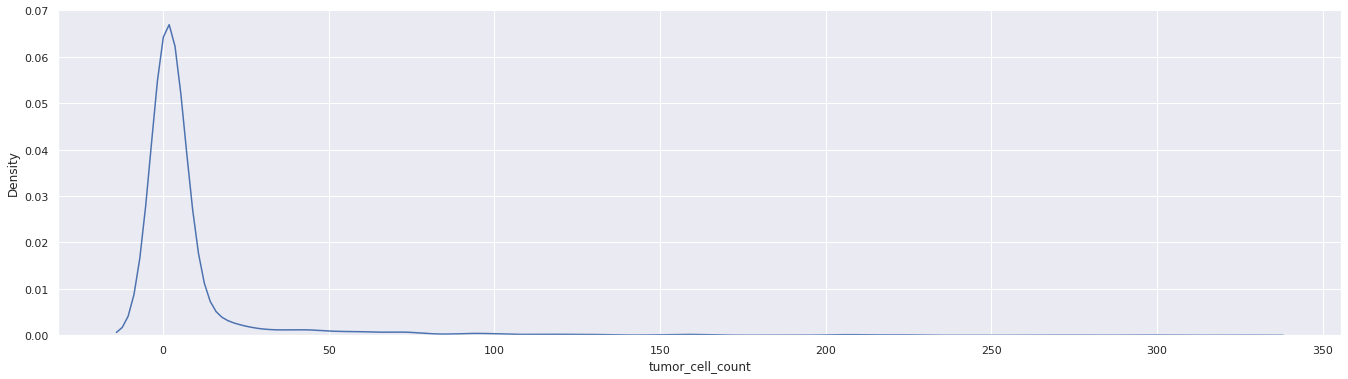

In [7]:
plt.figure(figsize=(23,6))
sns.kdeplot(train_df['tumor_cell_count'])


In [8]:
#Count of tumors often reported - index values number of tumors 
train_df['tumor_cell_count'].value_counts().head(5)

1    1829
2     364
3     127
4      93
6      43
Name: tumor_cell_count, dtype: int64

In [9]:
#Did something happen in a particular year that caused a rise in fatal tumors?
pd.DataFrame(train_df[train_df['death_due_to_cancer']==1].groupby('year_of_diagnosis').agg('sum'))

,tumor_cell_count,morphology_code,year_of_death,smoke_units,area_code,alcohol_consume_units,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,symptom7,symptom8,symptom9,symptom10,symptom11,symptom12,symptom13,symptom14,symptom15,symptom16,symptom17,symptom18,symptom19,symptom20,symptom21,symptom22,symptom23,symptom24,symptom25,symptom26,symptom27,symptom28,symptom29,symptom30,symptom31,symptom32,symptom33,symptom34,symptom35,symptom36,symptom37,symptom38,symptom39,symptom40,symptom50,symptom51,symptom52,symptom53,symptom54,symptom55,symptom56,symptom57,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer
year_of_diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009,3002,35666183,888700.0,6614,2321,1475,71.0,8.0,13.0,56.0,15.0,26.0,177.0,11.0,27.0,24.0,10.0,50.0,70.0,21.0,82.0,98.0,8.0,15.0,50.0,8.0,8.0,11.0,73.0,39.0,10.0,10.0,62.0,32.0,9.0,10.0,8.0,8.0,13.0,13.0,43.0,10.0,9.0,28.0,21.0,10.0,10.0,10.0,4.0,50.0,6.0,6.0,9.0,8.0,9.0,8.0,13.0,11.0,11.0,10.0,8.0,8.0,13.0,441
2010,2748,34513343,860880.0,6505,2251,1353,57.0,13.0,10.0,56.0,13.0,14.0,163.0,8.0,24.0,23.0,10.0,43.0,58.0,12.0,77.0,96.0,4.0,19.0,50.0,9.0,14.0,9.0,48.0,23.0,7.0,7.0,56.0,24.0,8.0,7.0,10.0,12.0,9.0,9.0,41.0,8.0,11.0,28.0,22.0,7.0,7.0,7.0,10.0,38.0,10.0,10.0,10.0,12.0,6.0,14.0,6.0,8.0,8.0,10.0,7.0,6.0,13.0,427
2011,2478,34753720,867294.0,6437,2168,1443,56.0,6.0,15.0,67.0,19.0,16.0,174.0,8.0,20.0,19.0,13.0,57.0,61.0,18.0,90.0,100.0,6.0,18.0,62.0,6.0,10.0,8.0,60.0,37.0,16.0,16.0,61.0,21.0,11.0,11.0,8.0,7.0,10.0,10.0,38.0,9.0,10.0,19.0,17.0,16.0,9.0,11.0,9.0,40.0,9.0,9.0,6.0,8.0,7.0,11.0,11.0,9.0,8.0,8.0,11.0,11.0,8.0,430
2012,3321,33190230,827304.0,6101,2198,1248,42.0,5.0,9.0,49.0,22.0,27.0,153.0,13.0,16.0,25.0,3.0,42.0,66.0,23.0,72.0,105.0,5.0,22.0,53.0,8.0,9.0,10.0,49.0,33.0,12.0,12.0,60.0,17.0,14.0,15.0,8.0,9.0,9.0,9.0,55.0,14.0,7.0,17.0,16.0,12.0,13.0,7.0,8.0,45.0,10.0,8.0,6.0,18.0,16.0,10.0,12.0,14.0,9.0,6.0,11.0,12.0,7.0,410
2013,3427,28826151,720556.0,5245,1865,1145,49.0,10.0,5.0,54.0,22.0,17.0,146.0,10.0,15.0,19.0,6.0,47.0,55.0,25.0,64.0,83.0,11.0,10.0,40.0,7.0,12.0,9.0,60.0,29.0,9.0,9.0,51.0,20.0,4.0,4.0,9.0,8.0,6.0,7.0,39.0,9.0,8.0,15.0,16.0,9.0,10.0,13.0,7.0,38.0,10.0,7.0,10.0,11.0,12.0,12.0,10.0,10.0,4.0,4.0,7.0,7.0,12.0,357


2013 saw fewer number of alcohol consumption, smoking and higher numbers of tumor counts but that could jut be sampling error

FEATURE ENGINEERING

In [10]:
#Average Time where those who didnt make it, fought it
train_df['years_fought'] = train_df['year_of_death'] - train_df['year_of_diagnosis']
test_df['years_fought'] = test_df['year_of_death'] - test_df['year_of_diagnosis']

Check average time of "years_fought"

In [11]:
train_df['years_fought'].mean(), test_df['years_fought'].mean()
#use this to impute missing values where 
mean_time_fought = train_df['years_fought'].mean()
mean_time_fought

5.863921568627451

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


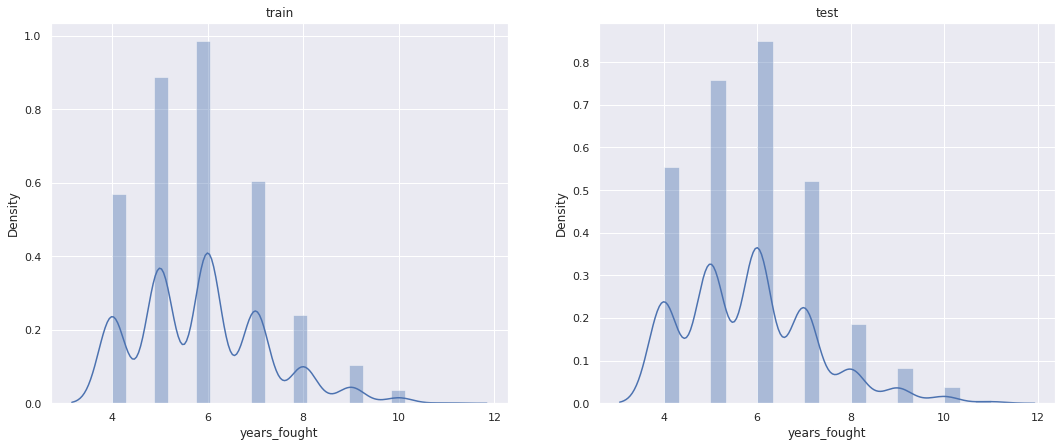

In [12]:
fig, ax = plt.subplots(1,2,figsize=(18,7))
sns.distplot(train_df['years_fought'], ax = ax[0])
ax[0].title.set_text("train")
sns.distplot(test_df['years_fought'], ax = ax[1])
ax[1].title.set_text("test")

Does ethnicity matter?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


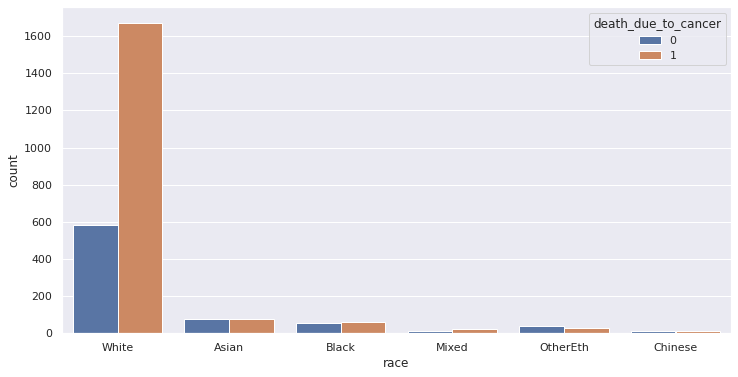

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(train_df['race'],hue=train_df['death_due_to_cancer'])
plt.show()

Some races seem to be more vulnerable, can confirm this using corr plot later

In [14]:
#for unknow race impute as OtherEth
train_df['race'] = train_df['race'].fillna('OtherEth')
test_df['race']=test_df['race'].fillna('OtherEth')

In [15]:
train_df.isna().info(), test_df.isna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 71 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   patient_id             2952 non-null   bool 
 1   tumor_cell_count       2952 non-null   bool 
 2   gender                 2952 non-null   bool 
 3   age_group              2952 non-null   bool 
 4   race                   2952 non-null   bool 
 5   year_of_diagnosis      2952 non-null   bool 
 6   morphology_code        2952 non-null   bool 
 7   year_of_death          2952 non-null   bool 
 8   smoke_units            2952 non-null   bool 
 9   area_code              2952 non-null   bool 
 10  alcohol_consume_units  2952 non-null   bool 
 11  symptoms               2952 non-null   bool 
 12  symptom1               2952 non-null   bool 
 13  symptom2               2952 non-null   bool 
 14  symptom3               2952 non-null   bool 
 15  symptom4               2952 non-null  

(None, None)

Using 2009 as the base year transform diagnosis year, drop year of death, impute fought year by mean

In [16]:
test_df.drop('year_of_death', axis = 1, inplace = True)
train_df.drop('year_of_death', axis = 1, inplace = True)

In [17]:
m = train_df['years_fought'].mean()
train_df['years_fought'][train_df['years_fought'].isna()] = m
test_df['years_fought'][test_df['years_fought'].isna()] = m

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
#finally fill all missing values from remaining columns with 0
train_df.fillna(0,inplace=True)
test_df.fillna(0, inplace=True)

In [19]:
train_df['age_group'] = train_df['age_group'].astype('str')
test_df['age_group'] = test_df['age_group'].astype('str')

ENCODE string COLUMN

In [20]:
#Symptoms has too many symptoms that are not common will stick to common 20 / top 20 reported symptoms - requires domainn knowledge but here brute method is applied
c= train_df['symptoms'].value_counts()
lst = c.head(20).index
lst

def replace_symptoms(x):
  global lst
  return x if x in lst else 'IRL'

train_df['symptoms'] = train_df['symptoms'].apply(lambda x : replace_symptoms(x))
test_df['symptoms'] = test_df['symptoms'].apply(lambda x : replace_symptoms(x))

In [21]:
OHE = OneHotEncoder(handle_unknown = 'ignore')
#Run encoder on DFs
r = OHE.fit_transform(train_df[['gender','age_group','race','morphology_code', 'area_code', 'symptoms']]).toarray()
train = pd.concat([train_df,pd.DataFrame(r)], axis =1)
r = OHE.transform(test_df[['gender','age_group','race','morphology_code', 'area_code', 'symptoms']]).toarray()
test = pd.concat([test_df,pd.DataFrame(r)], axis =1)
#Concatenate results
train.shape, test.shape

((2952, 180), (1969, 179))

In [22]:
#drop encoded columns
train.drop(['gender','age_group','race','morphology_code', 'area_code',  'symptoms'],inplace=True, axis =1)
test.drop(['gender','age_group','race','morphology_code', 'area_code', 'symptoms'],inplace=True, axis =1)

In [23]:
train['year_of_diagnosis'] =  train_df['year_of_diagnosis'] -2009
test['year_of_diagnosis'] = test_df['year_of_diagnosis'] - 2009
train.describe()

,tumor_cell_count,year_of_diagnosis,smoke_units,alcohol_consume_units,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,symptom7,symptom8,symptom9,symptom10,symptom11,symptom12,symptom13,symptom14,symptom15,symptom16,symptom17,symptom18,symptom19,symptom20,symptom21,symptom22,symptom23,symptom24,symptom25,symptom26,symptom27,symptom28,symptom29,symptom30,symptom31,symptom32,symptom33,symptom34,symptom35,symptom36,...,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109
count,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.00000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,...,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000
mean,8.036924,1.925136,14.992209,3.258469,0.139566,0.021341,0.021680,0.131436,0.047425,0.047764,0.392276,0.023035,0.047764,0.049797,0.019986,0.11687,0.137534,0.050136,0.188347,0.232724,0.020664,0.044038,0.113144,0.021341,0.025068,0.027100,0.143631,0.074187,0.024051,0.024051,0.138889,0.050136,0.023035,0.021680,0.020664,0.021341,0.022696,0.023374,0.101626,0.022358,...,0.000678,0.000339,0.001355,0.000339,0.000339,0.000339,0.000339,0.001355,0.001355,0.079607,0.095528,0.105691,0.082656,0.215786,0.109417,0.052507,0.189024,0.035569,0.034214,0.019648,0.020325,0.018293,0.010163,0.029133,0.015921,0.010501,0.009485,0.017954,0.025407,0.009824,0.024729,0.638550,0.017615,0.010840,0.019309,0.022358,0.019648,0.028455,0.014566,0.017276
std,24.840630,1.402237,7.926741,2.372024,0.346595,0.144544,0.145662,0.337934,0.212583,0.213303,0.488340,0.150041,0.213303,0.217562,0.139977,0.32132,0.344468,0.218261,0.391055,0.422639,0.142281,0.205214,0.316822,0.144544,0.156357,0.162403,0.350775,0.262119,0.153235,0.153235,0.345889,0.218261,0.150041,0.145662,0.142281,0.144544,0.148959,0.151114,0.302207,0.147869,...,0.026025,0.018405,0.036792,0.018405,0.018405,0.018405,0.018405,0.036792,0.036792,0.270730,0.293993,0.307494,0.275408,0.411436,0.312215,0.223084,0.391594,0.185245,0.181809,0.138810,0.141134,0.134030,0.100313,0.168207,0.125193,0.101954,0.096945,0.132806,0.157383,0.098644,0.155324,0.480502,0.131570,0.103568,0.137632,0.147869,0.138810,0.166298,0.119829,0.130322
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

SCALE columns with high max values

In [24]:
scaler = StandardScaler()
train[['tumor_cell_count',	'year_of_diagnosis',	'smoke_units',	'alcohol_consume_units']] = scaler.fit_transform(train[['tumor_cell_count',	'year_of_diagnosis',	'smoke_units',	'alcohol_consume_units']])
test[['tumor_cell_count',	'year_of_diagnosis',	'smoke_units',	'alcohol_consume_units']] = scaler.transform(test[['tumor_cell_count',	'year_of_diagnosis',	'smoke_units',	'alcohol_consume_units']])

In [25]:
train.describe()

,tumor_cell_count,year_of_diagnosis,smoke_units,alcohol_consume_units,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,symptom7,symptom8,symptom9,symptom10,symptom11,symptom12,symptom13,symptom14,symptom15,symptom16,symptom17,symptom18,symptom19,symptom20,symptom21,symptom22,symptom23,symptom24,symptom25,symptom26,symptom27,symptom28,symptom29,symptom30,symptom31,symptom32,symptom33,symptom34,symptom35,symptom36,...,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109
count,2.952000e+03,2.952000e+03,2.952000e+03,2.952000e+03,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.00000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,...,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000
mean,1.456604e-16,-1.093675e-16,8.189362e-17,-7.249640e-17,0.139566,0.021341,0.021680,0.131436,0.047425,0.047764,0.392276,0.023035,0.047764,0.049797,0.019986,0.11687,0.137534,0.050136,0.188347,0.232724,0.020664,0.044038,0.113144,0.021341,0.025068,0.027100,0.143631,0.074187,0.024051,0.024051,0.138889,0.050136,0.023035,0.021680,0.020664,0.021341,0.022696,0.023374,0.101626,0.022358,...,0.000678,0.000339,0.001355,0.000339,0.000339,0.000339,0.000339,0.001355,0.001355,0.079607,0.095528,0.105691,0.082656,0.215786,0.109417,0.052507,0.189024,0.035569,0.034214,0.019648,0.020325,0.018293,0.010163,0.029133,0.015921,0.010501,0.009485,0.017954,0.025407,0.009824,0.024729,0.638550,0.017615,0.010840,0.019309,0.022358,0.019648,0.028455,0.014566,0.017276
std,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,0.346595,0.144544,0.145662,0.337934,0.212583,0.213303,0.488340,0.150041,0.213303,0.217562,0.139977,0.32132,0.344468,0.218261,0.391055,0.422639,0.142281,0.205214,0.316822,0.144544,0.156357,0.162403,0.350775,0.262119,0.153235,0.153235,0.345889,0.218261,0.150041,0.145662,0.142281,0.144544,0.148959,0.151114,0.302207,0.147869,...,0.026025,0.018405,0.036792,0.018405,0.018405,0.018405,0.018405,0.036792,0.036792,0.270730,0.293993,0.307494,0.275408,0.411436,0.312215,0.223084,0.391594,0.185245,0.181809,0.138810,0.141134,0.134030,0.100313,0.168207,0.125193,0.101954,0.096945,0.132806,0.157383,0.098644,0.155324,0.480502,0.131570,0.103568,0.137632,0.147869,0.138810,0.166298,0.119829,0.130322
min,-2.833308e-01,-1.373136e+00,-1.891666e+00,-1.373941e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.833308e-01,-6.598689e-01,-6.299001e-01,-9.522888e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [60]:
#ignoring symptoms lets see what activities contribute to death due to cancer
train[['tumor_cell_count',	'smoke_units',	'alcohol_consume_units','death_due_to_cancer']].corr()
#inconclusive results

,tumor_cell_count,smoke_units,alcohol_consume_units,death_due_to_cancer
tumor_cell_count,1.000000,0.004609,-0.024690,-0.048203
smoke_units,0.004609,1.000000,-0.000434,-0.005306
alcohol_consume_units,-0.024690,-0.000434,1.000000,-0.020169
death_due_to_cancer,-0.048203,-0.005306,-0.020169,1.000000


Data Split into train and val sets

In [26]:
x_train,x_val, y_train,y_val = ttsp(train.drop(['patient_id','death_due_to_cancer'], inplace=False, axis=1),train['death_due_to_cancer'], random_state=7)

MODEL BUILDING

Choice includes Logistic Regression for binary classification

In [44]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

For model evaluation accuracy is not a good score due to class imbalance choose f1 score, auc, roc etc  

In [91]:
# to tackle imbalance, tweak the cost function to put a higher penalty on misclassifying  minority class
class_weight = {0:1.1, 1:0.5}
LogReg = LR(C = 5, max_iter= 1000, random_state=7, class_weight=None)
LogReg.fit(x_train, y_train)
y_predicted = LogReg.predict(x_val)
print('f1: ',f1_score(y_val, y_predicted),'| AuC/RoC: ',roc_auc_score(y_val, y_predicted),'| Accuracy : ',accuracy_score(y_val, y_predicted))

f1:  0.7823788546255506 | AuC/RoC:  0.5427394957983194 | Accuracy :  0.6653116531165312


The Base line Model is decent, training on the entire dataset 

In [92]:
LogReg.fit(train.drop(['patient_id','death_due_to_cancer'], inplace=False, axis=1),train['death_due_to_cancer'])
#make predictions
y_predicted = LogReg.predict(test.drop(['patient_id'], inplace=False, axis=1))

In [93]:
def create_submission(indx, df, name): #creates submission file
  df1 = pd.DataFrame(indx)
  df = pd.DataFrame(df)
  df= pd.concat([df1,df],axis =1)
  df.columns = ['patient_id','death_due_to_cancer']
  df.to_csv(name, index=False)
  print("done!")
  return df

In [94]:
create_submission(test['patient_id'],y_predicted, 'submission_weight.csv')

done!


,patient_id,death_due_to_cancer
0,TCBA-B8-0x7e9,1
1,TCBA-B8-0x6bc,1
2,TCBA-B8-0x1195,1
3,TCBA-B8-0x8a5,1
4,TCBA-B8-0xa21,1
...,...,...
1964,TCBA-B8-0xc5f,1
1965,TCBA-B8-0x267,1
1966,TCBA-B8-0xce9,1
1967,TCBA-B8-0xc20,1


,0
0,1
1,1
2,1
3,1
4,1
...,...
1964,1
1965,1
1966,1
1967,1
